In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_rows', 1000)
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
sentence_file = 'C:/Users/uneck/Documents/Thinkful/sentiment_labelled_sentences/sentiment_labelled_sentences/amazon_cells_labelled.txt'
    
    
sentences = pd.read_table(sentence_file,header= None)
sentences

,0,1
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [59]:
sentences.columns =['Review', 'Negative']
sentences

,Review,Negative
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [60]:
bad_keywords = ['waste','bad','problem', 'hate', 'poor', 'garbage', 'disappointed', 'dead']

for key in bad_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentences[str(key)] = sentences.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
sentences

,Review,Negative,waste,bad,problem,hate,poor,garbage,disappointed,dead
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,True,False,False,False,False,False,False,False


In [61]:
sentences['allcaps'] = sentences.Review.str.isupper()
sentences

,Review,Negative,waste,bad,problem,hate,poor,garbage,disappointed,dead,allcaps
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,False,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,True,False,False,False,False,False,False,False,False


In [62]:
sentences['Negative'] = (sentences['Negative'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.
sentences

,Review,Negative,waste,bad,problem,hate,poor,garbage,disappointed,dead,allcaps
0,So there is no way for me to plug it in here in the US unless I go by a converter.,True,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,True,False,False,False,False,False,False,False,False,False
4,The mic is great.,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,True,False,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",True,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",True,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,True,True,False,False,False,False,False,False,False,False


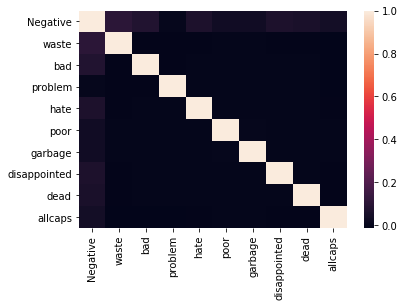

In [63]:
sns.heatmap(sentences.corr())

In [64]:
data = sentences[bad_keywords + ['allcaps']]
target = sentences['Negative']

In [65]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 465
